![torch_logo](https://drive.google.com/uc?export=view&id=1FrERQ1gmXL8dRejrDjBAqNnIXgr3gu9u)

# Installation pytorch

Installing pytorch is a complex process that varies depending on the version of CUDA and the environment of use. Read about installing the version that is right for you [here](https://pytorch.org/get-started/locally/)

# Basic work in pytorch

The basic element in pytorch is a multidimensional matrix - tensor
Pytorch is based on numpy so that vector operations can also be performed on tensors similarly to ndarray

In [ ]:
import torch

In [ ]:
torch.zeros([3, 4])

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
torch.ones([3, 4, 2])

tensor([[[1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.]]])

In [ ]:
torch.Tensor([[1,  2,  3,  4],
              [5,  6,  7,  8],
              [9, 10, 11, 12]])


tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])

In [ ]:
x = torch.Tensor([[1,  2,  3,  4],
                  [5,  6,  7,  8],
                  [9, 10, 11, 12]])

In [ ]:
x.size()

torch.Size([3, 4])

In [ ]:
x.shape

torch.Size([3, 4])

In [ ]:
x[0]

tensor([1., 2., 3., 4.])

In [ ]:
x[1]

tensor([5., 6., 7., 8.])

In [ ]:
x[0, 0]

tensor(1.)

In [ ]:
x[:, 0]

tensor([1., 5., 9.])

In [ ]:
x + 10

tensor([[11., 12., 13., 14.],
        [15., 16., 17., 18.],
        [19., 20., 21., 22.]])

In [ ]:
x ** 2

tensor([[  1.,   4.,   9.,  16.],
        [ 25.,  36.,  49.,  64.],
        [ 81., 100., 121., 144.]])

In [ ]:
y = torch.Tensor([[12, 11, 10, 9],
                  [8, 7, 6, 5],
                  [4, 3, 2, 1]])

In [ ]:
x + y

tensor([[13., 13., 13., 13.],
        [13., 13., 13., 13.],
        [13., 13., 13., 13.]])

In [ ]:
torch.exp(x)

tensor([[2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01],
        [1.4841e+02, 4.0343e+02, 1.0966e+03, 2.9810e+03],
        [8.1031e+03, 2.2026e+04, 5.9874e+04, 1.6275e+05]])

In [ ]:
torch.log(x)

tensor([[0.0000, 0.6931, 1.0986, 1.3863],
        [1.6094, 1.7918, 1.9459, 2.0794],
        [2.1972, 2.3026, 2.3979, 2.4849]])

In [ ]:
torch.sin(x)

tensor([[ 0.8415,  0.9093,  0.1411, -0.7568],
        [-0.9589, -0.2794,  0.6570,  0.9894],
        [ 0.4121, -0.5440, -1.0000, -0.5366]])

In [ ]:
x > 3

tensor([[False, False, False,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]])

In [ ]:
x[x > 3]

tensor([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

Tensors in pytorch have the type

In [ ]:
x = x.double()
print(x)
x = x.int()
print(x)
x = x.float()
print(x)

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]], dtype=torch.float64)
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]], dtype=torch.int32)
tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])


Since pytorch is based on numpy, it has a lot of functions that are "inherited"

Let`s get the diagonal of a dot product

In [ ]:
import numpy as np

In [ ]:
A_np = np.random.uniform(0,1,(5,5))
B_np = np.random.uniform(0,1,(5,5))

In [ ]:
np.sum(A_np * B_np.T, axis=1)

array([0.98919983, 1.65461387, 1.12061005, 1.92534175, 1.2071264 ])

And the same task on pytorch

In [ ]:
A_torch = torch.FloatTensor(5, 5).uniform_(0, 1)
B_torch = torch.FloatTensor(5, 5).uniform_(0, 1)

In [ ]:
torch.sum(A_torch * B_torch.T, axis=1)

tensor([1.1757, 1.6072, 1.6935, 0.8077, 1.8548])

# Computing on cuda

One of the main functions of pytorch is the ability to perform calculations on a video card
One of the main functions of pytorch is the ability to perform calculations on a video card. If you don't have a video card or torch.cuda.is_available() returns False - skip the next section

In [ ]:
torch.cuda.is_available()

False

In [ ]:
torch.device('cuda:0')

device(type='cuda', index=0)

In [ ]:
torch.device('cpu')

device(type='cpu')

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
x_cuda = x.to(device)
# x_cuda

Let's compare the speed of calculations on GPU and CPU

In [ ]:
# CPU
%time y = (x - x + x * 10.0) ** 2

CPU times: user 168 µs, sys: 31 µs, total: 199 µs
Wall time: 205 µs


In [ ]:
# GPU
%time y_cuda = (x_cuda - x_cuda + x_cuda * 10.0) ** 2

CPU times: user 162 µs, sys: 30 µs, total: 192 µs
Wall time: 202 µs


Well... For small amounts of data, gpu computing is not worth it

But let's compare on large tensors

In [ ]:
big_tensor = torch.rand((10000,10000))

In [ ]:
# CPU
%time (big_tensor - big_tensor + big_tensor * 10.0) ** 2

CPU times: user 308 ms, sys: 709 ms, total: 1.02 s
Wall time: 1.05 s


tensor([[1.5312e-02, 1.2888e+01, 2.0882e+01,  ..., 1.3533e-02, 3.6948e+01,
         4.6918e+01],
        [2.4941e+01, 7.8623e+01, 3.3098e+01,  ..., 2.8925e+01, 1.4413e-02,
         5.6138e+01],
        [5.1223e+00, 9.8603e-01, 1.1755e-01,  ..., 1.8352e+00, 5.9719e+01,
         1.4836e+01],
        ...,
        [7.1832e+01, 2.9171e+01, 3.1513e+00,  ..., 7.3270e-01, 9.7492e-03,
         1.0046e+01],
        [2.0437e+01, 1.0467e+01, 6.8497e+01,  ..., 2.0703e+01, 3.6937e+01,
         8.9356e+01],
        [2.3421e+01, 1.4691e+01, 2.2423e+01,  ..., 9.9675e-01, 8.8142e+01,
         6.0625e+01]])

In [ ]:
big_tensor_cuda = big_tensor.to(device)

In [ ]:
%time (big_tensor_cuda - big_tensor_cuda + big_tensor_cuda * 10.0) ** 2

CPU times: user 394 ms, sys: 255 ms, total: 649 ms
Wall time: 646 ms


tensor([[1.5312e-02, 1.2888e+01, 2.0882e+01,  ..., 1.3533e-02, 3.6948e+01,
         4.6918e+01],
        [2.4941e+01, 7.8623e+01, 3.3098e+01,  ..., 2.8925e+01, 1.4413e-02,
         5.6138e+01],
        [5.1223e+00, 9.8603e-01, 1.1755e-01,  ..., 1.8352e+00, 5.9719e+01,
         1.4836e+01],
        ...,
        [7.1832e+01, 2.9171e+01, 3.1513e+00,  ..., 7.3270e-01, 9.7492e-03,
         1.0046e+01],
        [2.0437e+01, 1.0467e+01, 6.8497e+01,  ..., 2.0703e+01, 3.6937e+01,
         8.9356e+01],
        [2.3421e+01, 1.4691e+01, 2.2423e+01,  ..., 9.9675e-01, 8.8142e+01,
         6.0625e+01]])

Yes, on large tensors the acceleration reaches tens and hundreds of times

# Pytorch for creating neural networks

Pytorch is a powerful library that has everything you need to build a neural network: gradient calculation, neural network layers, optimizers and much more

In [ ]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms

1. Basic autograd example 1

In [ ]:
# Create tensors.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

In [ ]:
# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

In [ ]:
# Compute gradients.
y.backward()

In [ ]:
# Print out the gradients.
print(x.grad)    # x.grad = 2
print(w.grad)    # w.grad = 1
print(b.grad)    # b.grad = 1

tensor(2.)
tensor(1.)
tensor(1.)


    2. Basic autograd example 2

In [ ]:
# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

In [ ]:
# Build a fully connected layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

w:  Parameter containing:
tensor([[ 0.5550, -0.0482,  0.2337],
        [ 0.2579, -0.3623,  0.1535]], requires_grad=True)
b:  Parameter containing:
tensor([-0.3629,  0.5467], requires_grad=True)


In [ ]:
# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

In [ ]:
# Forward pass.
pred = linear(x)

In [ ]:
# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item())

loss:  1.5264966487884521


In [ ]:
# Backward pass.
loss.backward()

In [ ]:
# Print out the gradients.
print ('dL/dw: ', linear.weight.grad)
print ('dL/db: ', linear.bias.grad)

dL/dw:  tensor([[0.5963, 0.0417, 0.0163],
        [0.3137, 0.2479, 0.5955]])
dL/db:  tensor([-0.7296,  0.7412])


In [ ]:
# 1-step gradient descent.
optimizer.step()

In [ ]:
# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

loss after 1 step optimization:  1.5070531368255615


# First neural network 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

Let's create a simple linear neural network for sine regression

Generate a training dataset

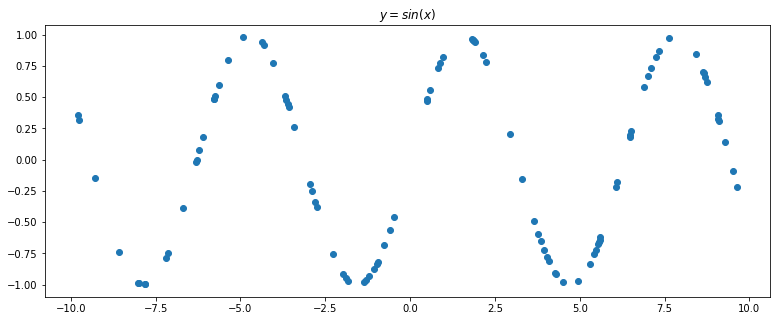

In [ ]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');

and a bit of Gaussian noise

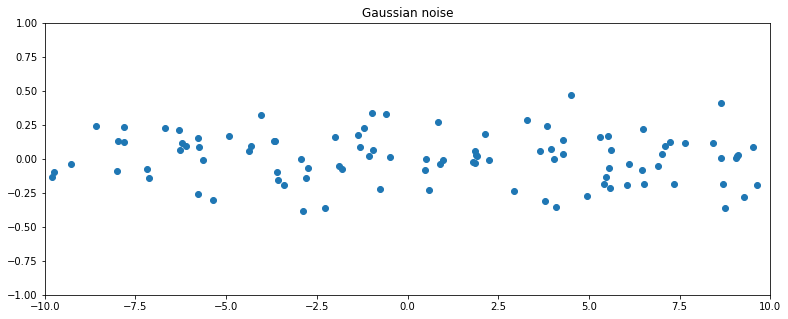

In [ ]:
noise = torch.randn(y_train.shape) / 5.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

Let's combine them. Now the sine is not so obvious

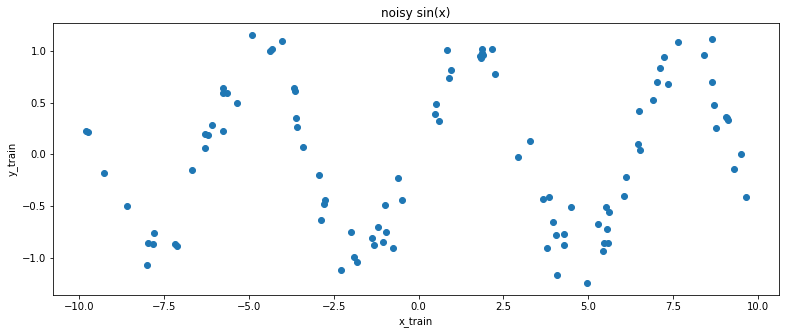

In [ ]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [ ]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);
tmp = torch.Tensor([1,2,3])
print(tmp)
print(tmp.unsqueeze(1))

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


Generate another pure sine as a test dataset

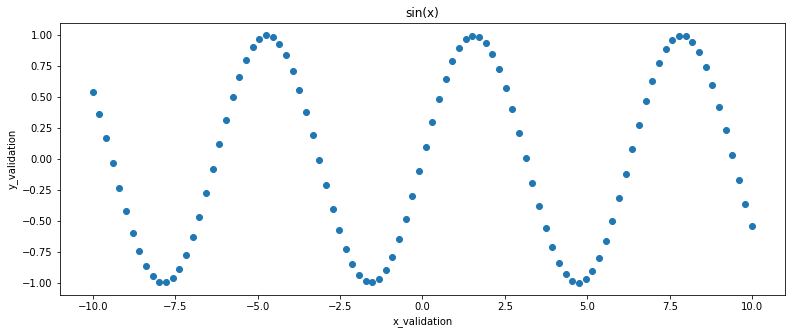

In [ ]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [ ]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

Let's create a model

In [ ]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        """ 
        OK, now your task is to write the forward function. 
        To do this, you need to take the input data x 
        and apply each of the layers to them one by one.
        Try it, it shouldn't be difficult! ( _ points)
        """
        return ...

sine_net = SineNet(3)

and a function for prediction

Let's try to make a test prediction. Maybe the network is good enough as it is?

In [ ]:
 def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

Let's create an optimizer and a loss function

In [ ]:
optimizer = torch.optim.SGD(sine_net.parameters(), lr=0.01)

In [ ]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

And finally, we will create a learning loop and train our neural network!

In [ ]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

predict(sine_net, x_validation, y_validation)

In [ ]:
print(loss_val)

Oooooey, it doesn't look that good... What is the problem? The problem is the size of the network - it is too small. You will need to solve this problem yourself now. Try to increase the number of neurons or add layers - everything is in your hands

# Write your own network(_ points)

In [ ]:
class YourSineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(YourSineNet, self).__init__()
        """Here you need to create a network architecture. 
           Specify the layers you want to use. For example,
           try using another activation function - nn.Sigmoid or nn.Tanh"""

    def forward(self, x):
        """ 
        Forward you have already created so it shouldn't be a problem at all
        """
        return ...


In [ ]:
your_sine_net = YourSineNet(n_hidden_neurons=...)

In [ ]:
your_optimizer = ... #You can also experiment with the optimizer

In [ ]:
for epoch_index in range(2000):
    your_optimizer.zero_grad()

    your_y_pred = your_sine_net.forward(x_train)
    your_loss_val = loss(your_y_pred, y_train)

    your_loss_val.backward()

    your_optimizer.step()

predict(your_sine_net, x_validation, y_validation)

In [ ]:
assert your_loss_val < 0.03

Unfortunately, a neural network with such a simple architecture cannot approximate data beyond the interval used in training

In [ ]:
predict(sine_net,torch.Tensor(np.linspace(100,110,20)).unsqueeze_(1),torch.sin(torch.Tensor(np.linspace(100,110,20)).unsqueeze_(1)))